In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
import os
import re
import random
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Reshape, Dropout
from keras import optimizers
from keras.callbacks import TensorBoard
import sys
from keras.utils import plot_model
import matplotlib.pyplot as plt
import json

Using TensorFlow backend.


In [2]:
NUMBER_OF_GENRES = 8
TRAIN_FILES_DIR = './train_files/'
CSV_FILE_PATH = './small_train_labels.csv'

In [3]:
csv_file = pd.read_csv(CSV_FILE_PATH)
all_genres = csv_file['genre'].unique()
genre_to_index = {genre: index for index, genre in enumerate(all_genres)}

In [4]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [5]:
UNIFORM_IMAGE_SIZE = (1000, 1000)
EPOCHS = 20
BATCH_SIZE = 10
LEARNING_RATE = 0.02
START = 0
FINISH = 100

In [6]:
def build_train_and_test_data():
  train_data = []
  train_labels = []

  list_of_files = os.listdir(TRAIN_FILES_DIR)[START:FINISH]
  for file_index, file in enumerate(list_of_files):
    raw_image = Image.open(TRAIN_FILES_DIR + file)
    resized_image = raw_image.resize(UNIFORM_IMAGE_SIZE)
    image_tensor = np.asarray(resized_image)
    train_data.append(image_tensor)

    file_as_str_number = re.sub('([a-z])|(\.)', '', file)
    label_name = csv_file[csv_file['track_id'] == int(file_as_str_number)]['genre'].values[0]
    train_labels.append(genre_to_index[label_name])
  return (
    np.array(train_data).astype(np.float32),
    np.array(train_labels, np.int32)
  )

In [7]:
train_data, train_labels = build_train_and_test_data()
train_data /= 255

dummy_labels = np.zeros((len(train_labels), NUMBER_OF_GENRES), np.float32)

for index, label in enumerate(train_labels):
  dummy_labels[index][label] = 1

In [8]:
model = Sequential()

model.add(
  Conv2D(2, (2, 1000),
         data_format="channels_last",
         padding="same",
         strides=2,
         input_shape=(1000, 1000, 4)
        )
)
model.add(MaxPooling2D(pool_size=(5, 5), strides=5))
model.add(
  Conv2D(4, (2, 500),
         data_format="channels_last",
         padding="same",
         strides=2,
         input_shape=(500, 500, 2)
        )
)
model.add(MaxPooling2D(pool_size=(5, 5), strides=5))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(NUMBER_OF_GENRES, activation="softmax"))

model.compile(optimizer=optimizers.Adadelta(lr=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0717 00:41:51.339769 140335259002624 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 00:41:51.341544 140335259002624 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 00:41:51.345171 140335259002624 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 00:41:51.361289 140335259002624 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0717 00:41:51.379102 140335259002624 deprecation_wrapp

In [9]:
history = model.fit(
  train_data,
  dummy_labels,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=0.2,
  verbose=1
)

W0717 00:42:01.118667 140335259002624 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 80 samples, validate on 20 samples
Epoch 1/20
80/80 [==============================] - 26s 330ms/step - loss: 2.1253 - acc: 0.1250 - val_loss: 2.1080 - val_acc: 0.1500
Epoch 2/20
80/80 [==============================] - 20s 248ms/step - loss: 2.0927 - acc: 0.1125 - val_loss: 2.1051 - val_acc: 0.0500
Epoch 3/20
80/80 [==============================] - 20s 248ms/step - loss: 2.0843 - acc: 0.1625 - val_loss: 2.1030 - val_acc: 0.0500
Epoch 4/20
80/80 [==============================] - 20s 249ms/step - loss: 2.0838 - acc: 0.1000 - val_loss: 2.1123 - val_acc: 0.0500
Epoch 5/20
80/80 [==============================] - 20s 250ms/step - loss: 2.0663 - acc: 0.1125 - val_loss: 2.1066 - val_acc: 0.0500
Epoch 6/20
80/80 [==============================] - 20s 250ms/step - loss: 2.0667 - acc: 0.1125 - val_loss: 2.1012 - val_acc: 0.0500
Epoch 7/20
80/80 [==============================] - 20s 250ms/step - loss: 2.0675 - acc: 0.1500 - val_loss: 2.0917 - val_acc: 0.0500
Epoch 8/20
80/80 [=======

## Plotting Accuracy and Loss

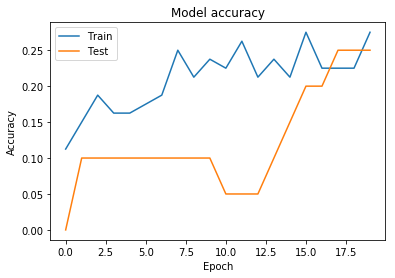

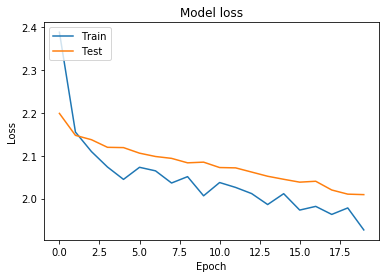

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
# serialize model to JSON
model_json = model.to_json()
with open("long-frame-model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("long-frame-model.h5")
print("Saved model to disk")

Saved model to disk


In [20]:
# Save entire model
model.save('long-frame-whole-model.h5')

In [15]:
json_history = json.dumps(history.history)

In [17]:
with open('./long-frame-json/whole-model/history-0-100.json', 'w') as file:
    json.dump(json_history, file)

In [18]:
with open('./long-frame-json/model-by-parts/history-0-100.json', 'w') as file:
    json.dump(json_history, file)